In [1]:
import numpy as np
import feature_extraction
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sas

In [2]:
from sklearn.metrics import accuracy_score

In [3]:
from sklearn.feature_selection import VarianceThreshold, mutual_info_classif
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.naive_bayes import GaussianNB

In [5]:

data = pd.read_csv('dataset_v3.csv')
data.head() 

# data = np.loadtxt("dataset.csv", delimiter = ",")

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [6]:
X = data.drop('Result', axis=1)
y = data['Result']

# X = data[1:-1 , 1:-1]
# y = data[1:-1 , -1]

# X = data[: , :-1]
# y = data[: , -1]

X.shape, y.shape
len(y)

11055

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [8]:
constant_filter = VarianceThreshold(threshold=0.01)
constant_filter.fit(X_train)
X_train_filter = constant_filter.transform(X_train)
X_test_filter = constant_filter.transform(X_test)

In [9]:
X_train_T = X_train_filter.T
X_test_T = X_test_filter.T

In [11]:
X_train_T = pd.DataFrame(X_train_T)
X_test_T = pd.DataFrame(X_test_T)

In [12]:
X_train_T.duplicated().sum()

0

In [13]:
duplicated_features = X_train_T.duplicated()

In [14]:
features_to_keep = [not index for index in duplicated_features]

In [15]:
X_train_unique = X_train_T[features_to_keep].T
X_test_unique = X_test_T[features_to_keep].T

In [16]:
X_train_unique.shape, X_test_unique.shape

((8844, 30), (2211, 30))

In [17]:
mi = mutual_info_classif(X_train_unique, y_train)

In [23]:
len(mi)
print(mi)

[2.40150796e-03 8.80317689e-03 0.00000000e+00 1.19975501e-03
 4.28815101e-03 9.03219155e-02 8.00747960e-02 3.50018303e-01
 2.99413050e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.91465905e-02 3.27932569e-01 3.41645167e-02 3.52637551e-02
 0.00000000e+00 1.67369067e-02 0.00000000e+00 1.28789714e-03
 2.29985026e-03 5.37361760e-05 0.00000000e+00 1.61685832e-02
 3.86656079e-03 6.83615424e-02 1.37226485e-02 1.94112772e-02
 3.54996058e-03 6.95154801e-03]


In [25]:
mi

array([2.40150796e-03, 8.80317689e-03, 0.00000000e+00, 1.19975501e-03,
       4.28815101e-03, 9.03219155e-02, 8.00747960e-02, 3.50018303e-01,
       2.99413050e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.91465905e-02, 3.27932569e-01, 3.41645167e-02, 3.52637551e-02,
       0.00000000e+00, 1.67369067e-02, 0.00000000e+00, 1.28789714e-03,
       2.29985026e-03, 5.37361760e-05, 0.00000000e+00, 1.61685832e-02,
       3.86656079e-03, 6.83615424e-02, 1.37226485e-02, 1.94112772e-02,
       3.54996058e-03, 6.95154801e-03])

In [26]:
mi = pd.Series(mi)
mi.index = X_train_unique.columns

In [27]:
mi.sort_values(ascending=False, inplace = True)

<AxesSubplot:>

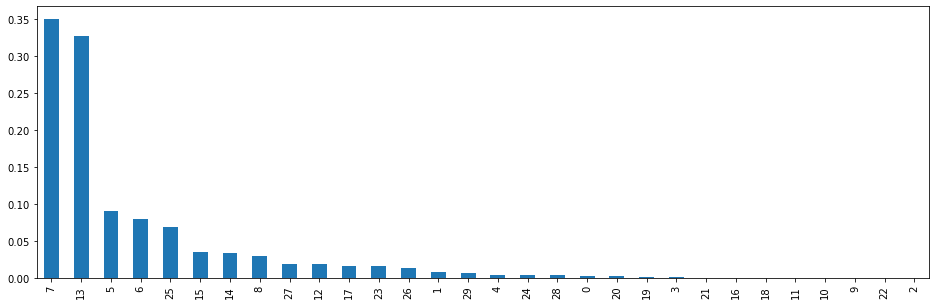

In [28]:
mi.plot.bar(figsize = (16, 5))

In [37]:
sel = SelectPercentile(mutual_info_classif, percentile=80).fit(X_train_unique, y_train)
X_train_unique.columns[sel.get_support()]

Int64Index([ 0,  1,  3,  4,  5,  6,  7,  8, 10, 12, 13, 14, 15, 16, 17, 20, 21,
            22, 23, 24, 25, 26, 27, 28],
           dtype='int64')

In [38]:
len(X_train_unique.columns[sel.get_support()])
print(X_train_unique.columns[sel.get_support()])

Int64Index([ 0,  1,  3,  4,  5,  6,  7,  8, 10, 12, 13, 14, 15, 16, 17, 20, 21,
            22, 23, 24, 25, 26, 27, 28],
           dtype='int64')


In [39]:
X_train_mi = sel.transform(X_train_unique)
X_test_mi = sel.transform(X_test_unique)


In [40]:
X_train_mi.shape

(8844, 24)

In [41]:
def run_randomForest(X_train, X_test, y_train, y_test):
    clf = rfc()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(len(y_pred))
    print('Accuracy on test set: ')
    print(accuracy_score(y_test, y_pred))

In [42]:
%%time 
run_randomForest(X_train_mi, X_test_mi, y_train, y_test)

2211
Accuracy on test set: 
0.9724106739032112
Wall time: 1.13 s


In [43]:
%%time 
run_randomForest(X_train, X_test, y_train, y_test)

2211
Accuracy on test set: 
0.9728629579375848
Wall time: 1.18 s


In [50]:
X_new = [-1,1,1,1,-1,-1,-1,-1,-1,1,1,-1,1,-1,1,-1,-1,-1,0,1,1,1,1,-1,-1,-1,-1,1,1,-1]
# 0,  1,  3,  4,  5,  6,  7,  8, 10, 12, 13, 14, 15, 16, 17, 20, 21, 22, 23, 24, 25, 26, 27, 28
print(len(X_new))

indices = X_train_unique.columns[sel.get_support()]
print(len(indices))
X_new_fil = [i for j, i in enumerate(X_new) if j in indices]

print(len(X_new_fil))
print(X_new_fil)

30
24
24
[-1, 1, 1, -1, -1, -1, -1, -1, 1, 1, -1, 1, -1, -1, -1, 1, 1, 1, -1, -1, -1, -1, 1, 1]
